In [17]:
import pandas as pd

df = pd.read_csv('training_set_VU_DM.csv')

In [18]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 17:
        return 1
    elif 17 <= hour < 21:
        return 2
    else:
        return 3

In [22]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['time_of_day'] = df['date_time'].dt.hour.apply(get_time_of_day)
df['is_weekend'] = df['date_time'].dt.dayofweek >= 5


df['price_per_night'] = df['price_usd'] / df['srch_length_of_stay']
df['star_rating_difference'] = df['prop_starrating'] - df['visitor_hist_starrating'].fillna(df['prop_starrating'])
df['is_domestic'] = (df['prop_country_id'] == df['visitor_location_country_id']).astype(int)

print(df[['time_of_day', 'star_rating_difference', 'is_domestic']].head())

print(df.columns)

   time_of_day  star_rating_difference  is_domestic
0            0                     0.0            0
1            0                     0.0            0
2            0                     0.0            0
3            0                     0.0            0
4            0                     0.0            0
Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp

In [20]:
#Competition features

df[[f'comp{i}_rate' for i in range(1, 9)]].fillna(0, inplace=True)

df['rate_advantage_count'] = (df[[f'comp{i}_rate' for i in range(1, 3)]].fillna(0) > 0).sum(axis=1)
df['rate_disadvantage_count'] = (df[[f'comp{i}_rate' for i in range(1, 3)]].fillna(0) < 0).sum(axis=1)
df['availability_advantage_count'] = (df[[f'comp{i}_inv' for i in range(1, 3)]].fillna(0) > 0).sum(axis=1)
df['avg_rate_percent_diff'] = df[[f'comp{i}_rate_percent_diff' for i in range(1, 3)]].mean(axis=1, skipna=True)
df['max_rate_percent_diff'] = df[[f'comp{i}_rate_percent_diff' for i in range(1, 3)]].max(axis=1, skipna=True)
df['min_rate_percent_diff'] = df[[f'comp{i}_rate_percent_diff' for i in range(1, 3)]].min(axis=1, skipna=True)

df.head

/var/folders/__/6x_r2ddd163c_j6x_mtwstbr0000gn/T/ipykernel_65816/1489280912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'comp{i}_rate' for i in range(1, 9)]].fillna(0, inplace=True)


<bound method NDFrame.head of          srch_id           date_time  site_id  visitor_location_country_id  \
0              1 2013-04-04 08:32:15       12                          187   
1              1 2013-04-04 08:32:15       12                          187   
2              1 2013-04-04 08:32:15       12                          187   
3              1 2013-04-04 08:32:15       12                          187   
4              1 2013-04-04 08:32:15       12                          187   
...          ...                 ...      ...                          ...   
4958342   332785 2013-06-30 19:55:18        5                          219   
4958343   332785 2013-06-30 19:55:18        5                          219   
4958344   332785 2013-06-30 19:55:18        5                          219   
4958345   332785 2013-06-30 19:55:18        5                          219   
4958346   332785 2013-06-30 19:55:18        5                          219   

         visitor_hist_starrating 

0


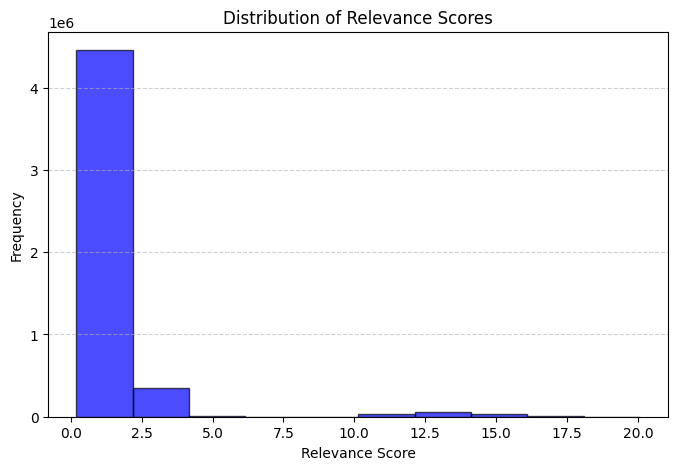

    position  relevance_score
0         27         0.285714
1         26         0.296296
2         21         0.363636
3         34         0.228571
4          4         1.600000
5          7         1.000000
6         18         0.421053
7         35         0.222222
8          3         2.000000
9         10         0.727273
10        20         0.380952
11        19         0.400000
12        13        11.318879
13         2         2.666667
14        15         0.500000
15        31         0.250000
16        23         0.333333
17        36         0.216216
18         8         0.888889
19         6         1.142857
20        28         0.275862
21         1         4.000000
22        32         0.242424
23        12         0.615385
24        24         0.320000
25        37         0.210526
26        33         0.235294
27        29         0.266667


In [33]:
#Creating relevance score

import numpy as np
import matplotlib.pyplot as plt
# Weights for each feature
click_weight = 1
booking_weight = 5
position_weight = 8  # Stronger emphasis on the position
print(df['position'].isnull().sum())


# Calculate the relevance score
# Calculate relevance score with condition
df['relevance_score'] = (
    (1 / (df['position'] + 1)) * position_weight +
    df['click_bool'] * click_weight +
    df['booking_bool'] * booking_weight +
    np.where(df['gross_bookings_usd'].notnull(), np.log(df['gross_bookings_usd'] + 1), 0)
)

# Plot the distribution of the relevance scores
plt.figure(figsize=(8, 5))
plt.hist(df['relevance_score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Relevance Scores')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print(df[df['srch_id'] == 1][['position', 'relevance_score']])



In [ ]:
 # Check feature "usefulness"
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming you have a numerical target variable named 'target'
# float_non_comp = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'srch_query_affinity_score', 'orig_destination_distance']

# corr_matrix = df[float_non_comp].corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()

# # List features that are highly correlated with the target
# threshold = 0.5  # Adjust this based on your dataset
# correlated_features = corr_matrix.index[abs(corr_matrix['click_bool']) > threshold]
# print(f"Highly Correlated Features with the Target: {list(correlated_features)}")


In [ ]:
from sklearn.impute import SimpleImputer

X = df.drop(columns=['click_bool', 'booking_bool', 'position', 'date_time'])
y = df['click_bool']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df)
# Compute mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to a DataFrame for readability
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

In [ ]:
df.to_csv('feature_eng_out.csv', index=False)